In [1]:
import pandas as pd
import csv
import seaborn as sns

In [2]:
types = {
    'beer/ABV':'float',
    'beer/name': 'category',
    'beer/style': 'category', 
    'review/appearance': 'category',
    'review/aroma':'category',
    'review/overall': 'float',
    'review/palate': 'category',
    'review/taste': 'category',
    'review/text': 'str',
    'user/ageInSeconds': 'float',
    'user/birthdayRaw':'category',
    'user/birthdayUnix':'float',
    'user/gender': 'category',
    'user/profileName': 'category'
}

In [3]:
df_dev = pd.read_csv("development.tsv", delimiter="\t", dtype=types)
df_dev

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,5.70,Barney Flats Oatmeal Stout,Oatmeal Stout,4.5,5.0,4.5,4.0,4.5,Pours a dark almost cola color with reddish br...,1.066918e+09,"Feb 19, 1981",351417600.0,Male,goblue3509
1,9.99,Brown Shugga',American Strong Ale,4.0,4.0,4.0,4.5,5.0,I went to a place called World Market in Oxnar...,NaN,NaN,NaN,NaN,Lounge14ABV
2,5.35,Casta Bruna (Pale Ale),English Pale Ale,3.0,3.0,4.0,3.0,3.5,I clicked on Casta tonight just to add some no...,NaN,NaN,NaN,NaN,DogFood11
3,8.00,Old Engine Oil Special Reserve (Aged In Malt W...,Old Ale,4.0,4.5,4.0,5.0,4.0,Wonderful little beer. Pours a deep brown with...,NaN,NaN,NaN,NaN,BasementDweller
4,7.00,Dark Humor,American Porter,3.5,4.0,4.0,4.0,4.5,Excited to see this on tap at Fathead's origin...,NaN,NaN,NaN,NaN,OneDropSoup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,4.70,Lvivske Premium,Euro Pale Lager,2.0,2.5,2.5,3.0,2.0,Thanks to witbier for the bottle...\tAppears a...,1.215789e+09,"Jun 2, 1976",202546800.0,Male,weeare138
69996,5.01,Samuel Adams East-West KÃ¶lsch,KÃ¶lsch,4.0,3.5,4.0,3.5,3.5,Poured into a glass as close to a stange that ...,1.359900e+09,"Nov 8, 1971",58435200.0,Male,ujsplace
69997,NaN,Sam The Man,American Strong Ale,3.5,3.5,3.5,3.0,3.5,This beer is basically a blend of the brewerie...,NaN,NaN,NaN,NaN,beertunes
69998,6.00,Chatoe Rogue First Growth Dirtoir Black Lager,Schwarzbier,4.0,4.0,4.0,4.0,4.0,"Poured a delightfully dense black, perhaps the...",NaN,NaN,NaN,NaN,Brent


In [4]:
df_dev.columns

Index(['beer/ABV', 'beer/name', 'beer/style', 'review/appearance',
       'review/aroma', 'review/overall', 'review/palate', 'review/taste',
       'review/text', 'user/ageInSeconds', 'user/birthdayRaw',
       'user/birthdayUnix', 'user/gender', 'user/profileName'],
      dtype='object')

In [5]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   beer/ABV           66893 non-null  float64 
 1   beer/name          70000 non-null  category
 2   beer/style         70000 non-null  category
 3   review/appearance  70000 non-null  category
 4   review/aroma       70000 non-null  category
 5   review/overall     70000 non-null  float64 
 6   review/palate      70000 non-null  category
 7   review/taste       70000 non-null  category
 8   review/text        69982 non-null  object  
 9   user/ageInSeconds  14645 non-null  float64 
 10  user/birthdayRaw   14645 non-null  category
 11  user/birthdayUnix  14645 non-null  float64 
 12  user/gender        28181 non-null  category
 13  user/profileName   69986 non-null  category
dtypes: category(9), float64(4), object(1)
memory usage: 4.7+ MB


In [6]:
df_dev.isna().sum()

beer/ABV              3107
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             18
user/ageInSeconds    55355
user/birthdayRaw     55355
user/birthdayUnix    55355
user/gender          41819
user/profileName        14
dtype: int64

In [7]:
df_dev.groupby(by='beer/style')["review/overall"].median().sort_values(ascending=False)

beer/style
Witbier                           4.0
English Bitter                    4.0
California Common / Steam Beer    4.0
Czech Pilsener                    4.0
Doppelbock                        4.0
                                 ... 
Kvass                             3.0
Light Lager                       3.0
Low Alcohol Beer                  3.0
American Adjunct Lager            3.0
Happoshu                          2.0
Name: review/overall, Length: 104, dtype: float64

<AxesSubplot:ylabel='beer/style'>

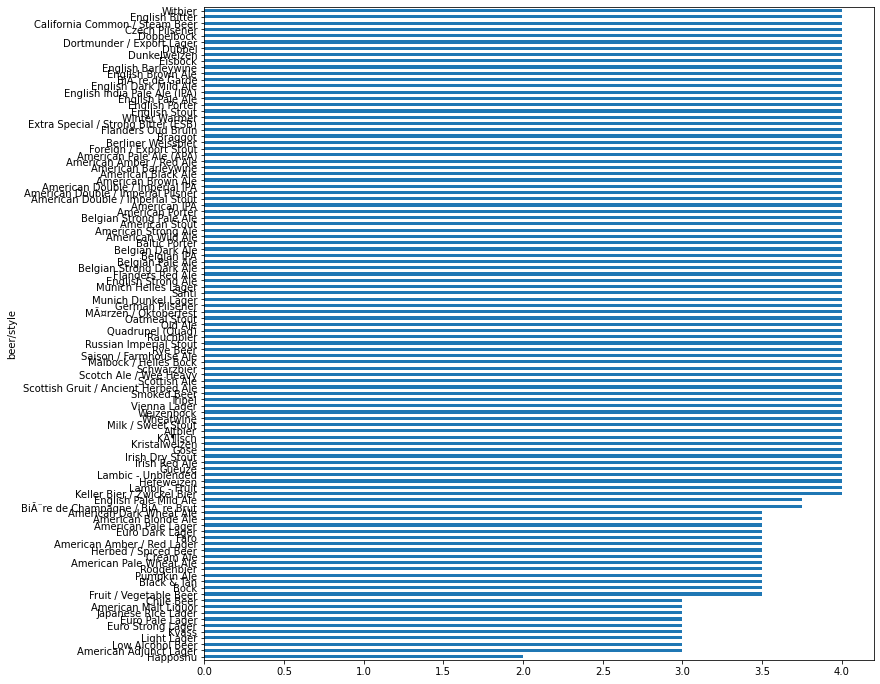

In [8]:
df_dev.groupby(by='beer/style')["review/overall"].median().sort_values(ascending=True).plot.barh(figsize=(12,12))

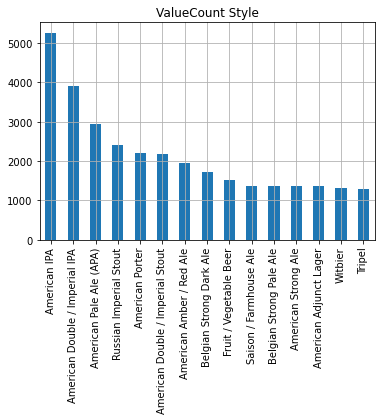

In [9]:
style=df_dev['beer/style'].value_counts()
style_list = style.head(15)
fig=style_list.plot.bar(title='ValueCount Style', grid=True)

In [10]:
#fig.figure.savefig('bar.eps', bbox_inches='tight')

Text(0, 0.5, 'count')

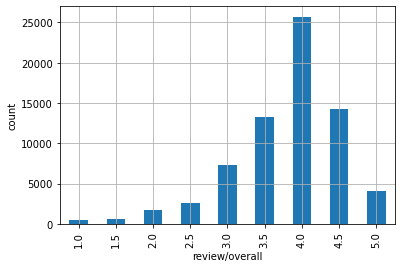

In [11]:
fig2 = df_dev['review/overall'].value_counts().sort_index().plot.bar(grid=True)
fig2.set_xlabel("review/overall")
fig2.set_ylabel("count")

In [12]:
#fig2.figure.savefig('bar_overall.eps', bbox_inches='tight')

In [13]:
df_dev['user/ageInSeconds'] = df_dev['user/ageInSeconds']*3.16887385E-8 #convert seconds to year
df_dev['user/ageInSeconds'] = df_dev['user/ageInSeconds'].round()
df_dev= df_dev.rename(columns={"user/ageInSeconds": "user/age"}) # rename the column
df_dev

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,user/age,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,5.70,Barney Flats Oatmeal Stout,Oatmeal Stout,4.5,5.0,4.5,4.0,4.5,Pours a dark almost cola color with reddish br...,34.0,"Feb 19, 1981",351417600.0,Male,goblue3509
1,9.99,Brown Shugga',American Strong Ale,4.0,4.0,4.0,4.5,5.0,I went to a place called World Market in Oxnar...,NaN,NaN,NaN,NaN,Lounge14ABV
2,5.35,Casta Bruna (Pale Ale),English Pale Ale,3.0,3.0,4.0,3.0,3.5,I clicked on Casta tonight just to add some no...,NaN,NaN,NaN,NaN,DogFood11
3,8.00,Old Engine Oil Special Reserve (Aged In Malt W...,Old Ale,4.0,4.5,4.0,5.0,4.0,Wonderful little beer. Pours a deep brown with...,NaN,NaN,NaN,NaN,BasementDweller
4,7.00,Dark Humor,American Porter,3.5,4.0,4.0,4.0,4.5,Excited to see this on tap at Fathead's origin...,NaN,NaN,NaN,NaN,OneDropSoup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,4.70,Lvivske Premium,Euro Pale Lager,2.0,2.5,2.5,3.0,2.0,Thanks to witbier for the bottle...\tAppears a...,39.0,"Jun 2, 1976",202546800.0,Male,weeare138
69996,5.01,Samuel Adams East-West KÃ¶lsch,KÃ¶lsch,4.0,3.5,4.0,3.5,3.5,Poured into a glass as close to a stange that ...,43.0,"Nov 8, 1971",58435200.0,Male,ujsplace
69997,NaN,Sam The Man,American Strong Ale,3.5,3.5,3.5,3.0,3.5,This beer is basically a blend of the brewerie...,NaN,NaN,NaN,NaN,beertunes
69998,6.00,Chatoe Rogue First Growth Dirtoir Black Lager,Schwarzbier,4.0,4.0,4.0,4.0,4.0,"Poured a delightfully dense black, perhaps the...",NaN,NaN,NaN,NaN,Brent


In [14]:
drop_columns=['user/birthdayRaw', 'user/birthdayUnix'] # drop these columns since we already have this info in user/age
df_dev = df_dev.drop(columns=drop_columns)
df_dev

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,user/age,user/gender,user/profileName
0,5.70,Barney Flats Oatmeal Stout,Oatmeal Stout,4.5,5.0,4.5,4.0,4.5,Pours a dark almost cola color with reddish br...,34.0,Male,goblue3509
1,9.99,Brown Shugga',American Strong Ale,4.0,4.0,4.0,4.5,5.0,I went to a place called World Market in Oxnar...,NaN,NaN,Lounge14ABV
2,5.35,Casta Bruna (Pale Ale),English Pale Ale,3.0,3.0,4.0,3.0,3.5,I clicked on Casta tonight just to add some no...,NaN,NaN,DogFood11
3,8.00,Old Engine Oil Special Reserve (Aged In Malt W...,Old Ale,4.0,4.5,4.0,5.0,4.0,Wonderful little beer. Pours a deep brown with...,NaN,NaN,BasementDweller
4,7.00,Dark Humor,American Porter,3.5,4.0,4.0,4.0,4.5,Excited to see this on tap at Fathead's origin...,NaN,NaN,OneDropSoup
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,4.70,Lvivske Premium,Euro Pale Lager,2.0,2.5,2.5,3.0,2.0,Thanks to witbier for the bottle...\tAppears a...,39.0,Male,weeare138
69996,5.01,Samuel Adams East-West KÃ¶lsch,KÃ¶lsch,4.0,3.5,4.0,3.5,3.5,Poured into a glass as close to a stange that ...,43.0,Male,ujsplace
69997,NaN,Sam The Man,American Strong Ale,3.5,3.5,3.5,3.0,3.5,This beer is basically a blend of the brewerie...,NaN,NaN,beertunes
69998,6.00,Chatoe Rogue First Growth Dirtoir Black Lager,Schwarzbier,4.0,4.0,4.0,4.0,4.0,"Poured a delightfully dense black, perhaps the...",NaN,NaN,Brent


In [15]:
df_dev.isna().sum()

beer/ABV              3107
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             18
user/age             55355
user/gender          41819
user/profileName        14
dtype: int64

In [16]:
n = df_dev.nunique(axis=0)
  
print("Number of unique values in each column :\n", n)

Number of unique values in each column :
 beer/ABV               336
beer/name            14770
beer/style             104
review/appearance        9
review/aroma             9
review/overall           9
review/palate            9
review/taste             9
review/text          69975
user/age                55
user/gender              2
user/profileName     10573
dtype: int64


In [17]:
cat_features = ['beer/name',
 'beer/style',
 'review/appearance',
 'review/aroma',
 'review/palate',
 'review/taste',
 'user/gender',
 'user/profileName']

In [18]:
for feature in cat_features:
    missing = f"missing_{feature}"
    df_dev[feature] = df_dev[feature].cat.add_categories(missing).fillna(missing)

df_dev

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,user/age,user/gender,user/profileName
0,5.70,Barney Flats Oatmeal Stout,Oatmeal Stout,4.5,5.0,4.5,4.0,4.5,Pours a dark almost cola color with reddish br...,34.0,Male,goblue3509
1,9.99,Brown Shugga',American Strong Ale,4.0,4.0,4.0,4.5,5.0,I went to a place called World Market in Oxnar...,NaN,missing_user/gender,Lounge14ABV
2,5.35,Casta Bruna (Pale Ale),English Pale Ale,3.0,3.0,4.0,3.0,3.5,I clicked on Casta tonight just to add some no...,NaN,missing_user/gender,DogFood11
3,8.00,Old Engine Oil Special Reserve (Aged In Malt W...,Old Ale,4.0,4.5,4.0,5.0,4.0,Wonderful little beer. Pours a deep brown with...,NaN,missing_user/gender,BasementDweller
4,7.00,Dark Humor,American Porter,3.5,4.0,4.0,4.0,4.5,Excited to see this on tap at Fathead's origin...,NaN,missing_user/gender,OneDropSoup
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,4.70,Lvivske Premium,Euro Pale Lager,2.0,2.5,2.5,3.0,2.0,Thanks to witbier for the bottle...\tAppears a...,39.0,Male,weeare138
69996,5.01,Samuel Adams East-West KÃ¶lsch,KÃ¶lsch,4.0,3.5,4.0,3.5,3.5,Poured into a glass as close to a stange that ...,43.0,Male,ujsplace
69997,NaN,Sam The Man,American Strong Ale,3.5,3.5,3.5,3.0,3.5,This beer is basically a blend of the brewerie...,NaN,missing_user/gender,beertunes
69998,6.00,Chatoe Rogue First Growth Dirtoir Black Lager,Schwarzbier,4.0,4.0,4.0,4.0,4.0,"Poured a delightfully dense black, perhaps the...",NaN,missing_user/gender,Brent


In [19]:
df_dev.isna().sum()

beer/ABV              3107
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             18
user/age             55355
user/gender              0
user/profileName         0
dtype: int64

In [20]:
df_dev['review/text'] = df_dev['review/text'].fillna('missing_review/text')
df_dev

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,user/age,user/gender,user/profileName
0,5.70,Barney Flats Oatmeal Stout,Oatmeal Stout,4.5,5.0,4.5,4.0,4.5,Pours a dark almost cola color with reddish br...,34.0,Male,goblue3509
1,9.99,Brown Shugga',American Strong Ale,4.0,4.0,4.0,4.5,5.0,I went to a place called World Market in Oxnar...,NaN,missing_user/gender,Lounge14ABV
2,5.35,Casta Bruna (Pale Ale),English Pale Ale,3.0,3.0,4.0,3.0,3.5,I clicked on Casta tonight just to add some no...,NaN,missing_user/gender,DogFood11
3,8.00,Old Engine Oil Special Reserve (Aged In Malt W...,Old Ale,4.0,4.5,4.0,5.0,4.0,Wonderful little beer. Pours a deep brown with...,NaN,missing_user/gender,BasementDweller
4,7.00,Dark Humor,American Porter,3.5,4.0,4.0,4.0,4.5,Excited to see this on tap at Fathead's origin...,NaN,missing_user/gender,OneDropSoup
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,4.70,Lvivske Premium,Euro Pale Lager,2.0,2.5,2.5,3.0,2.0,Thanks to witbier for the bottle...\tAppears a...,39.0,Male,weeare138
69996,5.01,Samuel Adams East-West KÃ¶lsch,KÃ¶lsch,4.0,3.5,4.0,3.5,3.5,Poured into a glass as close to a stange that ...,43.0,Male,ujsplace
69997,NaN,Sam The Man,American Strong Ale,3.5,3.5,3.5,3.0,3.5,This beer is basically a blend of the brewerie...,NaN,missing_user/gender,beertunes
69998,6.00,Chatoe Rogue First Growth Dirtoir Black Lager,Schwarzbier,4.0,4.0,4.0,4.0,4.0,"Poured a delightfully dense black, perhaps the...",NaN,missing_user/gender,Brent


In [21]:
df_dev.isna().sum()

beer/ABV              3107
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text              0
user/age             55355
user/gender              0
user/profileName         0
dtype: int64

In [22]:
X=df_dev.drop(columns='review/overall')
X

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/text,user/age,user/gender,user/profileName
0,5.70,Barney Flats Oatmeal Stout,Oatmeal Stout,4.5,5.0,4.0,4.5,Pours a dark almost cola color with reddish br...,34.0,Male,goblue3509
1,9.99,Brown Shugga',American Strong Ale,4.0,4.0,4.5,5.0,I went to a place called World Market in Oxnar...,NaN,missing_user/gender,Lounge14ABV
2,5.35,Casta Bruna (Pale Ale),English Pale Ale,3.0,3.0,3.0,3.5,I clicked on Casta tonight just to add some no...,NaN,missing_user/gender,DogFood11
3,8.00,Old Engine Oil Special Reserve (Aged In Malt W...,Old Ale,4.0,4.5,5.0,4.0,Wonderful little beer. Pours a deep brown with...,NaN,missing_user/gender,BasementDweller
4,7.00,Dark Humor,American Porter,3.5,4.0,4.0,4.5,Excited to see this on tap at Fathead's origin...,NaN,missing_user/gender,OneDropSoup
...,...,...,...,...,...,...,...,...,...,...,...
69995,4.70,Lvivske Premium,Euro Pale Lager,2.0,2.5,3.0,2.0,Thanks to witbier for the bottle...\tAppears a...,39.0,Male,weeare138
69996,5.01,Samuel Adams East-West KÃ¶lsch,KÃ¶lsch,4.0,3.5,3.5,3.5,Poured into a glass as close to a stange that ...,43.0,Male,ujsplace
69997,NaN,Sam The Man,American Strong Ale,3.5,3.5,3.0,3.5,This beer is basically a blend of the brewerie...,NaN,missing_user/gender,beertunes
69998,6.00,Chatoe Rogue First Growth Dirtoir Black Lager,Schwarzbier,4.0,4.0,4.0,4.0,"Poured a delightfully dense black, perhaps the...",NaN,missing_user/gender,Brent


In [23]:
y=df_dev['review/overall']
y

0        4.5
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
69995    2.5
69996    4.0
69997    3.5
69998    4.0
69999    4.0
Name: review/overall, Length: 70000, dtype: float64

In [24]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\salvo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
#nltk.download('wordnet')

In [26]:
#nltk.download('punkt')

In [27]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#from nltk.tokenize import word_tokenize
#from nltk.stem.wordnet import WordNetLemmatizer
#from nltk.corpus import stopwords as sw
#import re
#import string
#
#class LemmaTokenizer(object):
#    def __init__(self):
#        self.lemmatizer = WordNetLemmatizer()
#    def __call__(self, document):
#        lemmas = []
#        for t in word_tokenize(document): # return a list with any word of a review
#            t = t.strip() # remove all the leading and trailing spaces from a string
#            lemma = self.lemmatizer.lemmatize(t) #transfor any word to its base form
#            if lemma not in string.punctuation and \ # remove punctuation
#                len(lemma) > 3 and \ #remove short and long words
#                len(lemma) < 16
#                    lemmas.append(lemma)
#        return lemmas

In [28]:
#tokenizer = LemmaTokenizer()

In [29]:
%%time
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_features = ['beer/ABV', 'user/age']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_transformer = OneHotEncoder(handle_unknown='ignore')
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english')) #tokernizer=tokenizer

preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, cat_features),
        ('review', vectorizer, 'review/text')],
        remainder='drop')

Wall time: 65.3 ms


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
from sklearn.linear_model import Ridge

regressor = Pipeline(steps=[
        ('columns', preprocessor),
        ('regressor',  Ridge())]
)

In [32]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid_ridge = {
    'regressor__alpha': [0.01, 0.1, 1.0, 10, 17, 18, 20]
}


gs_ridge = GridSearchCV(regressor, param_grid_ridge, cv=5, n_jobs=-1)
gs_ridge.fit(X_train, y_train)

Wall time: 2min 23s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columns',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['beer/ABV',
                                                                          'user/age']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                              

In [33]:
gs_ridge.cv_results_

{'mean_fit_time': array([96.80949974, 39.24713192, 18.92895575, 10.02889209,  9.3465497 ,
        10.44541955,  9.39742389]),
 'std_fit_time': array([2.23179917, 0.99031096, 0.54834102, 0.30711592, 0.15304182,
        0.57091973, 1.24366717]),
 'mean_score_time': array([2.03855691, 2.29460769, 2.36282363, 1.83800898, 1.87601776,
        1.95533714, 1.33614683]),
 'std_score_time': array([0.10396926, 0.54284222, 0.43248685, 0.03427085, 0.09190586,
        0.18349167, 0.27321547]),
 'param_regressor__alpha': masked_array(data=[0.01, 0.1, 1.0, 10, 17, 18, 20],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'regressor__alpha': 0.01},
  {'regressor__alpha': 0.1},
  {'regressor__alpha': 1.0},
  {'regressor__alpha': 10},
  {'regressor__alpha': 17},
  {'regressor__alpha': 18},
  {'regressor__alpha': 20}],
 'split0_test_score': array([0.18957333, 0.5316697 , 0.66716497, 0.71134319, 0.71243505,
        0.7124

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, gs_ridge.predict(X_test))

0.7125217037707465

In [35]:
print("Best model configuration for ridge regression", gs_ridge.best_params_, "with R2:", gs_ridge.best_score_)

Best model configuration for ridge regression {'regressor__alpha': 18} with R2: 0.7074127978255538


In [36]:
%%time
from sklearn.linear_model import Lasso

regressor = Pipeline(steps=[
        ('columns', preprocessor),
        ('regressor',  Lasso())]
)

param_grid_lasso = {
    'regressor__alpha' : [1, 0.1, 0.01]
}

gs_lasso = GridSearchCV(regressor, param_grid_lasso, cv=5, n_jobs=-1)
gs_lasso.fit(X_train , y_train)

Wall time: 6min 49s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columns',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['beer/ABV',
                                                                          'user/age']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                              

In [37]:
gs_lasso.cv_results_

{'mean_fit_time': array([ 15.78673568,  20.59944639, 173.548488  ]),
 'std_fit_time': array([0.31701775, 1.99078739, 1.49174618]),
 'mean_score_time': array([1.70743771, 1.7722445 , 1.05977077]),
 'std_score_time': array([0.03359159, 0.31264064, 0.11884429]),
 'param_regressor__alpha': masked_array(data=[1, 0.1, 0.01],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'regressor__alpha': 1},
  {'regressor__alpha': 0.1},
  {'regressor__alpha': 0.01}],
 'split0_test_score': array([-2.57617876e-06,  1.20612354e-02,  6.00894661e-01]),
 'split1_test_score': array([-3.58033720e-04,  1.24123096e-02,  5.92519906e-01]),
 'split2_test_score': array([-0.00077668,  0.0085738 ,  0.59586415]),
 'split3_test_score': array([-9.86078844e-06,  1.00225963e-02,  5.96135606e-01]),
 'split4_test_score': array([-2.42130783e-05,  1.02055834e-02,  6.02279439e-01]),
 'mean_test_score': array([-2.34273615e-04,  1.06551041e-02,  5.97538751e-01]),
 'std_test

In [38]:
r2_score(y_test, gs_lasso.predict(X_test))

0.5972680250885988

In [39]:
print("Best model configuration for Lasso regression", gs_lasso.best_params_, "with R2:", gs_lasso.best_score_)

Best model configuration for Lasso regression {'regressor__alpha': 0.01} with R2: 0.5975387513626798


In [41]:
%%time
from lightgbm import LGBMRegressor

regressor = Pipeline(
    steps=[
        ('columns', preprocessor),
        ('regressor',  LGBMRegressor())
    ]
)

param_grid_lgbm = {
    'regressor__num_leaves': [16, 32, 64, 128], 
    'regressor__min_child_samples': [10, 20, 30]
}


gs_lgbm = GridSearchCV(regressor, param_grid_lgbm, cv=5, n_jobs=-1)
gs_lgbm.fit(X_train, y_train)

Wall time: 11min 23s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columns',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['beer/ABV',
                                                                          'user/age']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                              

In [42]:
gs_lgbm.cv_results_

{'mean_fit_time': array([ 57.97599249,  71.05458555,  99.98756886, 152.4492856 ,
         46.86542807,  55.54214916,  81.16499281, 126.17260542,
         42.23544292,  55.96044579,  76.46842375,  88.7974833 ]),
 'std_fit_time': array([ 0.90758735,  1.15343012,  3.04794685,  2.47495864,  2.62676823,
         1.31295717,  1.34751506,  0.9552669 ,  1.01594423,  1.2477836 ,
         0.41077343, 14.29025032]),
 'mean_score_time': array([2.21511068, 2.21831169, 2.42358527, 2.56811681, 2.33200746,
        2.22145686, 2.5166069 , 2.88206849, 2.55016189, 2.25282583,
        2.39260674, 1.59083352]),
 'std_score_time': array([0.09076742, 0.11531923, 0.19764856, 0.10739279, 0.10129152,
        0.09375883, 0.03363187, 0.21137555, 0.4133362 , 0.09028806,
        0.09343987, 0.28879276]),
 'param_regressor__min_child_samples': masked_array(data=[10, 10, 10, 10, 20, 20, 20, 20, 30, 30, 30, 30],
              mask=[False, False, False, False, False, False, False, False,
                    False, Fals

In [43]:
r2_score(y_test, gs_lgbm.predict(X_test))

0.7071751849290364

In [44]:
print("Best model configuration for LightGBM", gs_lgbm.best_params_, "with R2:", gs_lgbm.best_score_)

Best model configuration for LightGBM {'regressor__min_child_samples': 20, 'regressor__num_leaves': 64} with R2: 0.7054394191904677


In [ ]:
%%time

from sklearn.ensemble import RandomForestRegressor

regressor = Pipeline(
    steps=[
        ('columns', preprocessor),
        ('regressor',  RandomForestRegressor())
    ]
)

param_grid_rf = {
    'regressor__n_estimators': [100, 200], 
    'regressor__max_depth': [5, 10]
}

gs_rf = GridSearchCV(regressor, param_grid_rf, cv=5, n_jobs=-1)
gs_rf.fit(X_train, y_train)

CPU times: user 25min 7s, sys: 7.29 s, total: 25min 14s
Wall time: 2h 39min 27s


In [ ]:
gs_rf.cv_results_

{'mean_fit_time': array([ 226.38516417,  447.02650743,  837.36877985, 1581.98478241]),
 'mean_score_time': array([2.5083148 , 3.17167521, 2.64713407, 3.04227619]),
 'mean_test_score': array([0.62638735, 0.62627489, 0.6759296 , 0.67629043]),
 'param_reg__max_depth': masked_array(data=[5, 5, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_reg__n_estimators': masked_array(data=[100, 200, 100, 200],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'reg__max_depth': 5, 'reg__n_estimators': 100},
  {'reg__max_depth': 5, 'reg__n_estimators': 200},
  {'reg__max_depth': 10, 'reg__n_estimators': 100},
  {'reg__max_depth': 10, 'reg__n_estimators': 200}],
 'rank_test_score': array([3, 4, 2, 1], dtype=int32),
 'split0_test_score': array([0.62996325, 0.63014187, 0.68001133, 0.68064377]),
 'split1_test_score': array([0.60679874, 0.60973952, 0.65374959, 0.65442874]),
 

In [ ]:
r2_score(y_test, gs_rf.predict(X_test))
# 0.6782539713111982

In [ ]:
print("Best model configuration for random forest", gs_rf.best_params_, "with R2:", gs_rf.best_score_)

Best model configuration for linear regression {'reg__max_depth': 10, 'reg__n_estimators': 200} with R2: 0.6762904258869051


In [45]:
df_eval = pd.read_csv("evaluation.tsv", delimiter="\t", dtype=types)
df_eval

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/text,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,5.1,Roxy Rolles,American Amber / Red Ale,3.0,3.0,3.0,1.5,Disagreeing with the Bros on this one...\t\tAp...,NaN,NaN,NaN,NaN,lilbrewmonkey
1,10.0,Burton Baton,American Double / Imperial IPA,4.5,4.0,5.0,4.0,Love this brew. I'll start with a review of th...,NaN,NaN,NaN,NaN,Tripphop
2,5.6,Old #38 Stout,Irish Dry Stout,4.0,4.0,3.0,4.0,"Dark brown color, medium head. Deeply roasted ...",1.782054e+09,"Jun 23, 1958",-363718800.0,Male,beerguy101
3,7.2,Indian Brown Ale,American Brown Ale,4.5,4.5,4.0,5.0,"Pours a completely black, opaque color, with a...",NaN,NaN,NaN,Male,terrabyte
4,3.6,Greene King IPA Draught Bitter,English Bitter,3.0,2.0,2.5,2.0,Refreshingly lime-infused which is a complimen...,NaN,NaN,NaN,Male,ngandhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,8.5,Jefferson's Reserve Bourbon Barrel Stout,American Double / Imperial Stout,4.0,3.0,3.0,3.0,12oz received in a nice surprise box from Free...,NaN,NaN,NaN,NaN,JohnGalt1
29996,6.0,Session Ale #15: S.W.I.L.L.,American Adjunct Lager,4.0,3.5,4.0,3.5,Pours a clouded yellow. Basically no head. Nos...,NaN,NaN,NaN,NaN,RblWthACoz
29997,4.6,Anchor Summer Beer,American Pale Wheat Ale,4.0,2.5,2.5,2.5,"It is Summer. Therefore, it makes sense to dri...",NaN,NaN,NaN,NaN,cnally
29998,4.2,Firestone Lager,Munich Dunkel Lager,3.5,3.5,3.5,3.5,dark brown with a huge billowing white head th...,NaN,NaN,NaN,NaN,mikesgroove


In [46]:
df_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   beer/ABV           28715 non-null  float64 
 1   beer/name          30000 non-null  category
 2   beer/style         30000 non-null  category
 3   review/appearance  30000 non-null  category
 4   review/aroma       30000 non-null  category
 5   review/palate      30000 non-null  category
 6   review/taste       30000 non-null  category
 7   review/text        29996 non-null  object  
 8   user/ageInSeconds  6272 non-null   float64 
 9   user/birthdayRaw   6272 non-null   category
 10  user/birthdayUnix  6272 non-null   float64 
 11  user/gender        12130 non-null  category
 12  user/profileName   29997 non-null  category
dtypes: category(9), float64(3), object(1)
memory usage: 2.1+ MB


In [47]:
df_eval.isna().sum()

beer/ABV              1285
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/palate            0
review/taste             0
review/text              4
user/ageInSeconds    23728
user/birthdayRaw     23728
user/birthdayUnix    23728
user/gender          17870
user/profileName         3
dtype: int64

In [48]:
df_eval['user/ageInSeconds'] = df_eval['user/ageInSeconds']*3.16887385E-8
df_eval['user/ageInSeconds'] = df_eval['user/ageInSeconds'].round()
df_eval= df_eval.rename(columns={"user/ageInSeconds": "user/age"})
df_eval

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/text,user/age,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,5.1,Roxy Rolles,American Amber / Red Ale,3.0,3.0,3.0,1.5,Disagreeing with the Bros on this one...\t\tAp...,NaN,NaN,NaN,NaN,lilbrewmonkey
1,10.0,Burton Baton,American Double / Imperial IPA,4.5,4.0,5.0,4.0,Love this brew. I'll start with a review of th...,NaN,NaN,NaN,NaN,Tripphop
2,5.6,Old #38 Stout,Irish Dry Stout,4.0,4.0,3.0,4.0,"Dark brown color, medium head. Deeply roasted ...",56.0,"Jun 23, 1958",-363718800.0,Male,beerguy101
3,7.2,Indian Brown Ale,American Brown Ale,4.5,4.5,4.0,5.0,"Pours a completely black, opaque color, with a...",NaN,NaN,NaN,Male,terrabyte
4,3.6,Greene King IPA Draught Bitter,English Bitter,3.0,2.0,2.5,2.0,Refreshingly lime-infused which is a complimen...,NaN,NaN,NaN,Male,ngandhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,8.5,Jefferson's Reserve Bourbon Barrel Stout,American Double / Imperial Stout,4.0,3.0,3.0,3.0,12oz received in a nice surprise box from Free...,NaN,NaN,NaN,NaN,JohnGalt1
29996,6.0,Session Ale #15: S.W.I.L.L.,American Adjunct Lager,4.0,3.5,4.0,3.5,Pours a clouded yellow. Basically no head. Nos...,NaN,NaN,NaN,NaN,RblWthACoz
29997,4.6,Anchor Summer Beer,American Pale Wheat Ale,4.0,2.5,2.5,2.5,"It is Summer. Therefore, it makes sense to dri...",NaN,NaN,NaN,NaN,cnally
29998,4.2,Firestone Lager,Munich Dunkel Lager,3.5,3.5,3.5,3.5,dark brown with a huge billowing white head th...,NaN,NaN,NaN,NaN,mikesgroove


In [49]:
df_eval = df_eval.drop(columns=drop_columns)
df_eval

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/text,user/age,user/gender,user/profileName
0,5.1,Roxy Rolles,American Amber / Red Ale,3.0,3.0,3.0,1.5,Disagreeing with the Bros on this one...\t\tAp...,NaN,NaN,lilbrewmonkey
1,10.0,Burton Baton,American Double / Imperial IPA,4.5,4.0,5.0,4.0,Love this brew. I'll start with a review of th...,NaN,NaN,Tripphop
2,5.6,Old #38 Stout,Irish Dry Stout,4.0,4.0,3.0,4.0,"Dark brown color, medium head. Deeply roasted ...",56.0,Male,beerguy101
3,7.2,Indian Brown Ale,American Brown Ale,4.5,4.5,4.0,5.0,"Pours a completely black, opaque color, with a...",NaN,Male,terrabyte
4,3.6,Greene King IPA Draught Bitter,English Bitter,3.0,2.0,2.5,2.0,Refreshingly lime-infused which is a complimen...,NaN,Male,ngandhi
...,...,...,...,...,...,...,...,...,...,...,...
29995,8.5,Jefferson's Reserve Bourbon Barrel Stout,American Double / Imperial Stout,4.0,3.0,3.0,3.0,12oz received in a nice surprise box from Free...,NaN,NaN,JohnGalt1
29996,6.0,Session Ale #15: S.W.I.L.L.,American Adjunct Lager,4.0,3.5,4.0,3.5,Pours a clouded yellow. Basically no head. Nos...,NaN,NaN,RblWthACoz
29997,4.6,Anchor Summer Beer,American Pale Wheat Ale,4.0,2.5,2.5,2.5,"It is Summer. Therefore, it makes sense to dri...",NaN,NaN,cnally
29998,4.2,Firestone Lager,Munich Dunkel Lager,3.5,3.5,3.5,3.5,dark brown with a huge billowing white head th...,NaN,NaN,mikesgroove


In [50]:
df_eval.isna().sum()

beer/ABV              1285
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/palate            0
review/taste             0
review/text              4
user/age             23728
user/gender          17870
user/profileName         3
dtype: int64

In [51]:
df_eval.columns

Index(['beer/ABV', 'beer/name', 'beer/style', 'review/appearance',
       'review/aroma', 'review/palate', 'review/taste', 'review/text',
       'user/age', 'user/gender', 'user/profileName'],
      dtype='object')

In [52]:
for feature in cat_features:
    missing = f"missing_{feature}"
    df_eval[feature] = df_eval[feature].cat.add_categories(missing).fillna(missing)

df_eval

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/text,user/age,user/gender,user/profileName
0,5.1,Roxy Rolles,American Amber / Red Ale,3.0,3.0,3.0,1.5,Disagreeing with the Bros on this one...\t\tAp...,NaN,missing_user/gender,lilbrewmonkey
1,10.0,Burton Baton,American Double / Imperial IPA,4.5,4.0,5.0,4.0,Love this brew. I'll start with a review of th...,NaN,missing_user/gender,Tripphop
2,5.6,Old #38 Stout,Irish Dry Stout,4.0,4.0,3.0,4.0,"Dark brown color, medium head. Deeply roasted ...",56.0,Male,beerguy101
3,7.2,Indian Brown Ale,American Brown Ale,4.5,4.5,4.0,5.0,"Pours a completely black, opaque color, with a...",NaN,Male,terrabyte
4,3.6,Greene King IPA Draught Bitter,English Bitter,3.0,2.0,2.5,2.0,Refreshingly lime-infused which is a complimen...,NaN,Male,ngandhi
...,...,...,...,...,...,...,...,...,...,...,...
29995,8.5,Jefferson's Reserve Bourbon Barrel Stout,American Double / Imperial Stout,4.0,3.0,3.0,3.0,12oz received in a nice surprise box from Free...,NaN,missing_user/gender,JohnGalt1
29996,6.0,Session Ale #15: S.W.I.L.L.,American Adjunct Lager,4.0,3.5,4.0,3.5,Pours a clouded yellow. Basically no head. Nos...,NaN,missing_user/gender,RblWthACoz
29997,4.6,Anchor Summer Beer,American Pale Wheat Ale,4.0,2.5,2.5,2.5,"It is Summer. Therefore, it makes sense to dri...",NaN,missing_user/gender,cnally
29998,4.2,Firestone Lager,Munich Dunkel Lager,3.5,3.5,3.5,3.5,dark brown with a huge billowing white head th...,NaN,missing_user/gender,mikesgroove


In [53]:
df_eval['review/text'] = df_eval['review/text'].fillna('missing_review/text')
df_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   beer/ABV           28715 non-null  float64 
 1   beer/name          30000 non-null  category
 2   beer/style         30000 non-null  category
 3   review/appearance  30000 non-null  category
 4   review/aroma       30000 non-null  category
 5   review/palate      30000 non-null  category
 6   review/taste       30000 non-null  category
 7   review/text        30000 non-null  object  
 8   user/age           6272 non-null   float64 
 9   user/gender        30000 non-null  category
 10  user/profileName   30000 non-null  category
dtypes: category(8), float64(2), object(1)
memory usage: 1.7+ MB


In [54]:
%%time
reg_final = gs_ridge.fit(X, y)

Wall time: 3min 53s


In [55]:
%%time
y_eval = reg_final.predict(df_eval)
y_eval

Wall time: 2.61 s


array([2.04501358, 4.10535588, 3.74017071, ..., 2.9859681 , 3.91194464,
       4.38681077])

In [56]:
pred = pd.DataFrame(y_eval, columns=['Predicted'])
pred

,Predicted
0,2.045014
1,4.105356
2,3.740171
3,4.362610
4,2.262631
...,...
29995,3.088120
29996,3.789870
29997,2.985968
29998,3.911945


In [57]:
pred.to_csv('output.csv',index_label='Id')

In [36]:
from sklearn import set_config

set_config(display='diagram')
gs_ridge

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columns',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['beer/ABV',
                                                                          'user/age']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['beer/name',
                                                                          'beer/style',
                                                                          'review/appearance',
                                                                          'review/aroma',
                                                                          'review/palate',
                                                                          'review/taste',
                                                                          'u...
                                                                         TfidfVectorizer(stop_words=['i',
                                                                                                     'me',
                                                                                                     'my',
                                                                                                     'myself',
                                                                                                     'we',
                                                                                                     'our',
                                                                                                     'ours',
                                                                                                     'ourselves',
                                                                                                     'you',
                                                                                                     "you're",
                                                                                                     "you've",
                                                                                                     "you'll",
                                                                                                     "you'd",
                                                                                                     'your',
                                                                                                     'yours',
                                                                                                     'yourself',
                                                                                                     'yourselves',
                                                                                                     'he',
                                                                                                     'him',
                                                                                                     'his',
                                                                                                     'himself',
                                                                                                     'she',
               

In [ ]:
#X_tfidf = vectorizer.fit_transform(df_dev['review/text'])
#freq = sorted(zip(vectorizer.get_feature_names(), X_tfidf.sum(axis=0).tolist()[0]),key=lambda x: x[1], reverse=True)

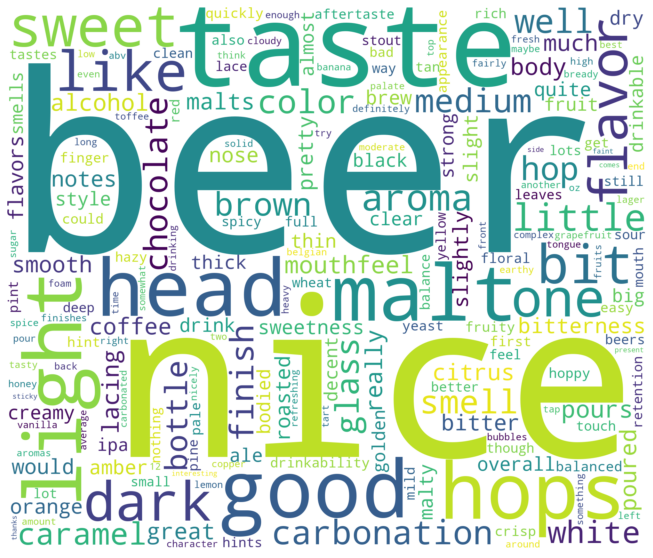

In [ ]:
#import matplotlib.pyplot as plt
#from wordcloud import WordCloud
#wordcloud = WordCloud(width=2000, height=1700,max_words=200, background_color="white")
#wordcloud.generate_from_frequencies(dict(freq))
#words=plt.figure(figsize=(15,10))
#plt.imshow(wordcloud, interpolation="bilinear")
#plt.axis("off")
#plt.show()

In [ ]:
#words.savefig('wordcloud.eps', bbox_inches='tight', pad_inches=0)

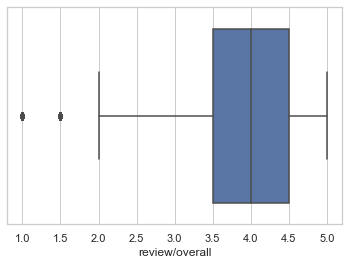

In [ ]:
#sns.set_theme(style="whitegrid")
#boxplot= sns.boxplot(x=df_dev['review/overall'])

In [ ]:
#boxplot.figure.savefig("boxplot.eps", bbox_inches='tight')